In [7]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import wrangle

# Acquire

In [2]:
df = pd.read_csv('allservicecalls.csv')

# Prepare

In [3]:
df = wrangle.clean_311(df)
df.head()

,case_id,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,level_of_delay,zipcode
0,1010444245,2012-08-15,2012-08-30,NaT,YES,Code Enforcement Services,cleanup,Graffiti Public Property,Open,Web Portal,"600 NOGALITOS ST, San Antonio, 78204",5,2125683.0,13695548.0,NaN,15,NaN,Still Open,78204
1,1010888252,2013-06-06,2013-08-09,NaT,YES,Code Enforcement Services,code,Alley-Way Maintenance,Open,Web Portal,"6043 CASTLE QUEEN, San Antonio, 78218",2,2169702.0,13725769.0,NaN,64,NaN,Still Open,78218
2,1010966128,2013-07-19,2013-09-23,NaT,YES,Code Enforcement Services,code,Junk Vehicle On Private Property,Open,Web Portal,"842 KIRK PL, San Antonio, 78226",5,2116192.0,13692260.0,NaN,66,NaN,Still Open,78226
3,1011052825,2013-09-16,2013-09-30,NaT,YES,Code Enforcement Services,code,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"54 KENROCK RIDGE, San Antonio, 78254",7,2082242.0,13737817.0,NaN,14,NaN,Still Open,78254
4,1011052826,2013-09-16,2013-09-30,NaT,YES,Code Enforcement Services,code,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"74 KENROCK RIDGE, San Antonio, 78254",7,2082389.0,13737877.0,NaN,14,NaN,Still Open,78254


# Plan Out Explore

## Questions we want to answer

1. Is there a link to which form of reporting is responded to quickest and slowest?
2. Is the average number of calls in an area affect the response time?
3. Does the type of call in an area effect the level of delay? (Loose dog on the south side vs loose dog on the north side)
4. Does the specific location effect the delay time?
5. Does category/department affect response time?
6. Is response time for issue X different between geographical location Y when compared to the average response time? (or other geographical location?)
7. late_status and open_days by: zip code, department, source_id (Do different areas get better general service? Do different areas get better service depending on the department/issue?)Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)
8. Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)
9. Is there a difference in response time between districts?
10. What months or quarters of the year have the higherst volumn of calls? Does this impact how fast they respond?

### Lori's Questions
1. Is there a link to which form of reporting is responded to quickest and slowest?
3. Does the type of call in an area effect the level of delay? (Loose dog on the south side vs loose dog on the north side)

### Gabby's Questions
5. Does category/department affect response time?
6. Is response time for issue X different between geographical location Y when compared to the average response time? (or other geographical location?)

### Sam's Questions
7. late_status and open_days by: zip code, department, source_id (Do different areas get better general service? Do different areas get better service depending on the department/issue?)Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)
8. Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)

### John's Questions
9. Is there a difference in response time between districts?
10. What months or quarters of the year have the higherst volumn of calls? Does this impact how fast they respond?

### Caitlyn's Questions
2. Is the average number of calls in an area affect the response time?
4. Does the specific location effect the delay time?

___

# Start Exploring

___

## Is the average number of calls in an area affect the response time?

### Game plan
- Use the following features in this exploratory analysis
    - zip code
    - council district
    - days_open
    - resolution_days_due
    - days_before_or_after_due
    - level_of_delay
- Look at the Univariate of each
    - Jot down thoughts, questions, and take aways
- Create bivariate plots seeing how each one plays into one anohter
- Create multivariate  plots

___

## Univariate

#### Zipcode

___

#### Council District

<AxesSubplot:>

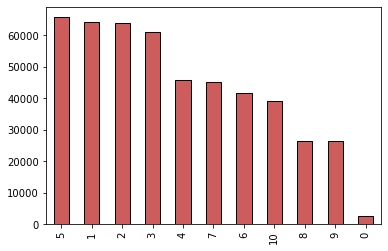

In [51]:
df['council_district'].value_counts().plot.bar(color='indianred', edgecolor='black')

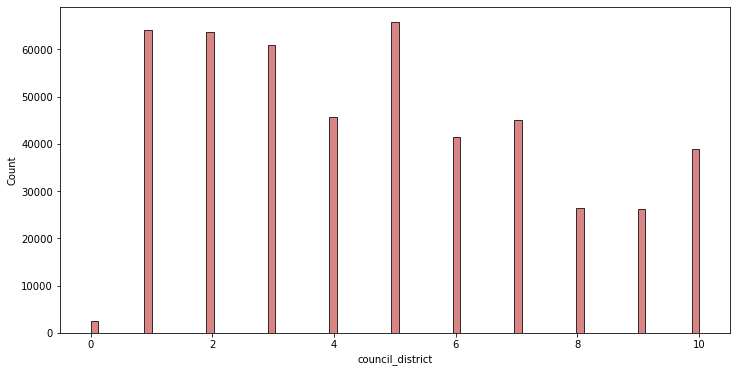

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df.council_district, color='indianred', edgecolor='black')
plt.show()

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


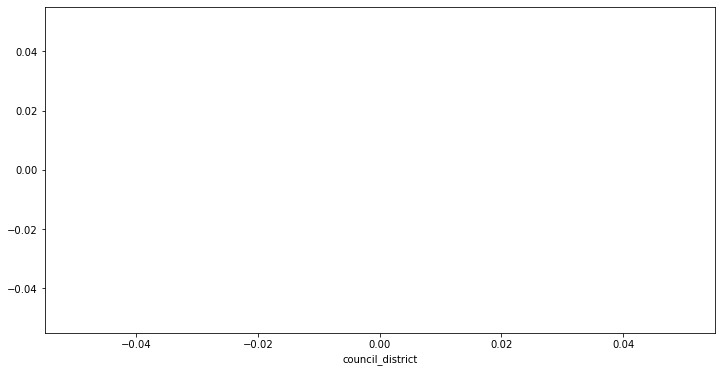

In [48]:
plt.figure(figsize=(12,6))
sns.lineplot(df.council_district, color='indianred')
plt.show()

___

#### Days Open

___

#### Days Until Resolution is Due

___

#### Days Before or After Due Date the Resolution was Made

___

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481205 entries, 0 to 495439
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   case_id                   481205 non-null  int64         
 1   open_date                 481205 non-null  datetime64[ns]
 2   due_date                  481205 non-null  datetime64[ns]
 3   closed_date               431696 non-null  datetime64[ns]
 4   is_late                   481205 non-null  object        
 5   dept                      481205 non-null  object        
 6   call_reason               481205 non-null  object        
 7   case_type                 481205 non-null  object        
 8   case_status               481205 non-null  object        
 9   source_id                 481205 non-null  object        
 10  address                   481205 non-null  object        
 11  council_district          481205 non-null  int64         
 12  lo